In [1]:
import os, shutil
import itertools
import numpy as np
from scipy.special import factorial
from matplotlib import pyplot as plt

In [3]:
n = 16
sf = np.array(list(map(list, itertools.product([0, 1], repeat=n))))
probs = np.zeros(sf.shape)

for i in range(2**n):
    craft = np.array(.75)
    for ii in range(n):
        if sf[i, ii] == 0:
            probs[i, ii] = 1 - craft
            craft = np.min([craft + .1, .75])
        else:
            probs[i, ii] = craft
            craft = np.max([craft - .1, .25])

In [4]:
probs.prod(1).max(), sf[probs.prod(1).argmax()]

(0.00011299319083973996,
 array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]))

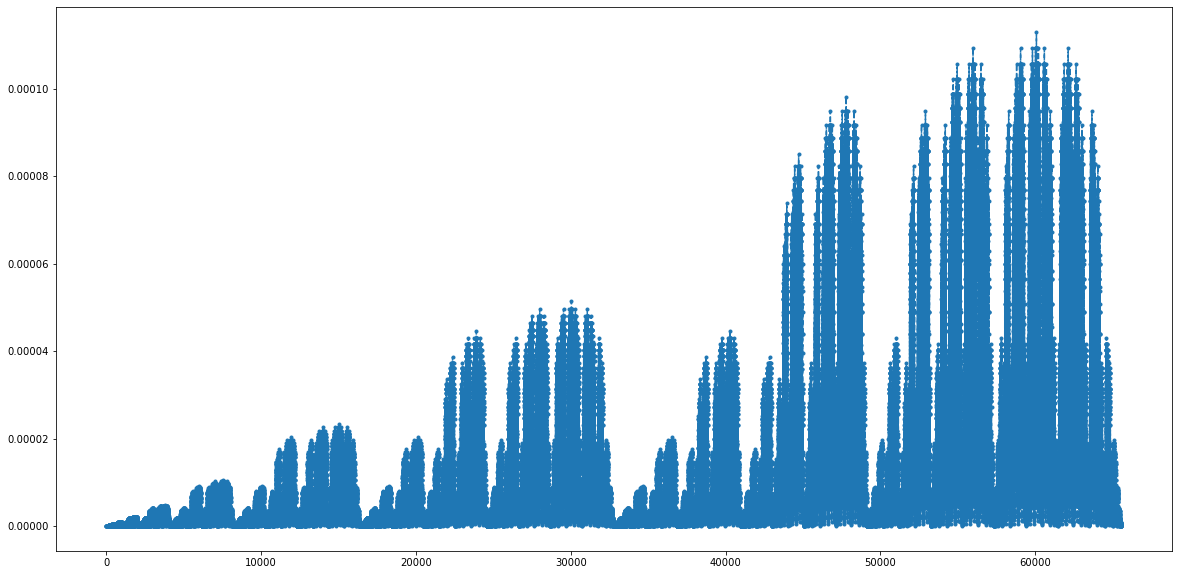

In [5]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(probs.prod(1), '.--')
if n < 7:
    ax.set_xticks(np.arange(len(sf)))
    ax.set_xticklabels(sf, rotation = 90)
print('')

In [ ]:
craft = np.array(.75)

results = []
for i in range(5000000):
    result = []
    for j in range(30):
        rand = np.random.random()
        if rand <= craft:
            result.append(1)
            craft = np.max([craft - .1, .25])
        else:
            result.append(0)
            craft = np.min([craft + .1, .75])
    results.append(result)
    if i % 1000 == 0:
        print('{:6d}'.format(i), end = '\r')

In [ ]:
A = np.array(results)
Asum = A.sum(axis = 1)

In [ ]:
x = plt.hist(Asum, bins = 31, range = (-.5, 30.5))

In [ ]:
Asum == 15

In [ ]:
plt.plot(A[Asum == 15].sum(axis = 0))
# plt.ylim((0, 90000))

In [ ]:
base = 22
plt.plot(A[Asum == base].sum(axis = 0) / A[Asum == base].shape[0])

In [ ]:
for i in x[0]:
    print(i)